# Chartmill Value Indicator

https://www.motivewave.com/studies/chartmill_value_indicator.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257282,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719707,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640194,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319607,164101200


In [3]:
n = 14 # Number of Periods
df['VC'] = pd.Series((df['High'] + df['Low']) / 2).rolling(n).mean()
df['TH'] = df[['High', 'Adj Close']].max(axis=1).shift(1) # True High
df['TL'] = df[['Low', 'Adj Close']].min(axis=1).shift(1) # True Low
df['TR'] = df['TH'] - df['TL'] # True Range
df['ATR'] = df['TR'].rolling(n).mean() # Average True Range
df['CVI'] = (df['Adj Close'] - df['VC']) / df['ATR']


In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,VC,TH,TL,TR,ATR,CVI
Date,,,,,,,,,,,,
2019-01-23,38.537498,38.785000,37.924999,38.480000,37.083336,92522400,37.885000,39.182499,36.933975,2.248524,1.708317,-0.469271
2019-01-24,38.527500,38.619999,37.935001,38.174999,36.789417,101766000,38.050179,38.785000,37.083336,1.701664,1.710903,-0.736898
2019-01-25,38.869999,39.532501,38.580002,39.439999,38.008492,134142000,38.229643,38.619999,36.789417,1.830582,1.686464,-0.131133
2019-01-28,38.947498,39.082500,38.415001,39.075001,37.656757,104768400,38.365893,39.532501,38.008492,1.524010,1.694051,-0.418603
2019-01-29,39.062500,39.532501,38.527500,38.669998,37.266441,166348800,38.472143,39.082500,37.656757,1.425743,1.683940,-0.716001


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,VC,TH,TL,TR,ATR,CVI
Date,,,,,,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517097,48478800,68.726786,71.062500,69.451073,1.611427,1.820333,0.434158
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896332,93121200,69.138036,71.222504,69.517097,1.705406,1.812145,0.970285
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000,69.529018,72.495003,70.896332,1.598671,1.817336,0.737566
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290054,144114400,69.905804,73.492500,70.869423,2.623077,1.894060,0.730838
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810944,100805600,70.327857,73.172501,71.290054,1.882446,1.855251,0.799399


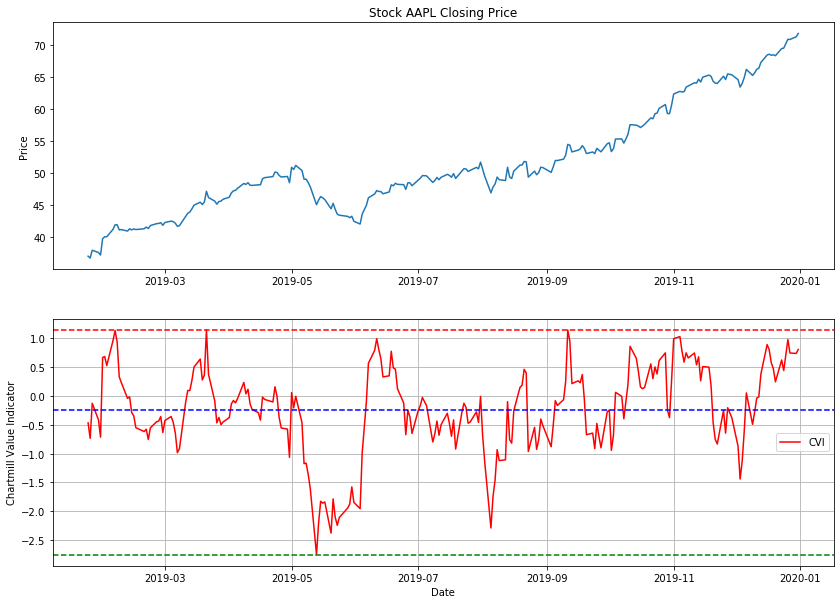

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CVI'], label='CVI', color='red')
ax2.axhline(y=df['CVI'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['CVI'].min(), color='green', linestyle='--')
ax2.axhline(y=df['CVI'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Chartmill Value Indicator')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

Text(0.5, 0, 'Date')

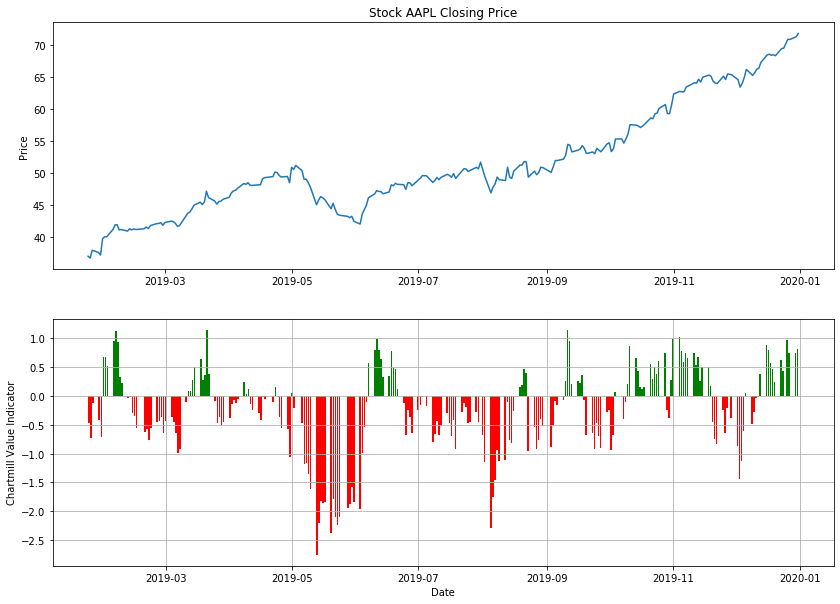

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

df['Positive'] = df['CVI'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['CVI'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Chartmill Value Indicator')
ax2.set_xlabel('Date')

## Candlestick with Chartmill Value Indicator

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VC,TH,TL,TR,ATR,CVI,Positive,VolumePositive
0,737082.0,38.537498,38.785000,37.924999,38.480000,37.083336,92522400,37.885000,39.182499,36.933975,2.248524,1.708317,-0.469271,False,False
1,737083.0,38.527500,38.619999,37.935001,38.174999,36.789417,101766000,38.050179,38.785000,37.083336,1.701664,1.710903,-0.736898,False,False
2,737084.0,38.869999,39.532501,38.580002,39.439999,38.008492,134142000,38.229643,38.619999,36.789417,1.830582,1.686464,-0.131133,False,False
3,737087.0,38.947498,39.082500,38.415001,39.075001,37.656757,104768400,38.365893,39.532501,38.008492,1.524010,1.694051,-0.418603,False,False
4,737088.0,39.062500,39.532501,38.527500,38.669998,37.266441,166348800,38.472143,39.082500,37.656757,1.425743,1.683940,-0.716001,False,False


Text(0.5, 0, 'Date')

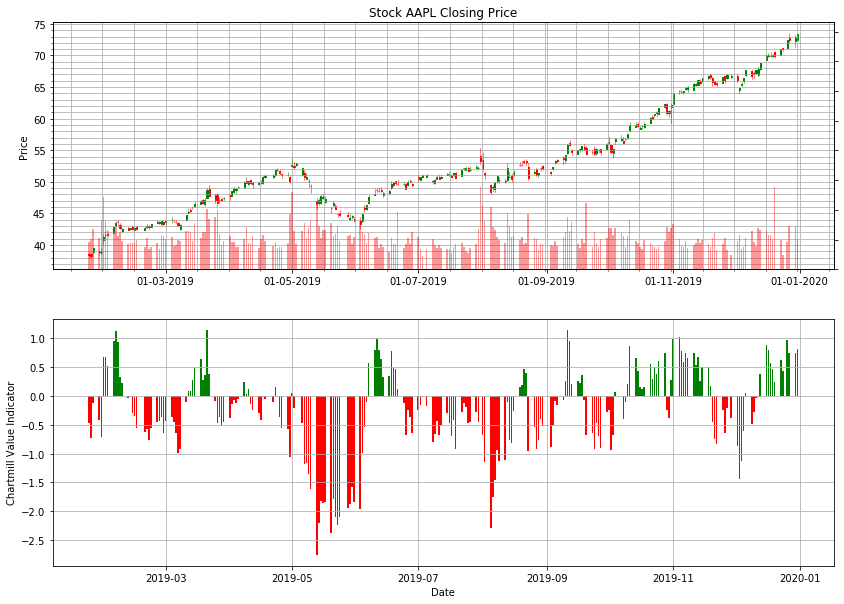

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

df['Positive'] = df['CVI'] > 0
ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['CVI'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Chartmill Value Indicator')
ax2.set_xlabel('Date')